In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
names = ["Naive Bayes", "QDA","Decision Tree", "Random Forest", "Neural Net", "AdaBoost","Nearest Neighbors", "Linear SVM", "RBF SVM"]
classifiers =[GaussianNB(),QuadraticDiscriminantAnalysis(),DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=5),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)]
classifiers_A =[GaussianNB(),QuadraticDiscriminantAnalysis(),DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(activation='identity',alpha=.1),
    AdaBoostClassifier(),KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree'),
    SVC(kernel="linear", C=1),
    SVC(gamma=2, C=1)]

In [3]:
path = "/home/jorgher/Documents/faceRec/CFEE/"
files = sorted(glob.glob(path+'*.csv'))
files = files[:7]
emotions_ = ["neutral",'happy','sad','fearful','angry','surprised','disgusted']
emotions = [0,1,2,3,4,5,6]
#emotions = [0,1,2,3,4]
n_classes = len(emotions)
dbs = []
for i,f in enumerate(files):
    db = pd.read_csv(f)
    db['file'] = db['file'].map(lambda x: str(x)[15:])
    db['file'] = db['file'].map(lambda x: str(x)[:-4]).astype(int)
    db['Subjet'] = db['file']
    db['Emotions'] = emotions[i]
    dbs.append(db)

db = (pd.concat(dbs[i][:] for i in range(len(files))))
db = db.sort_values('file')
#df['Emotion']=df['file']
db.drop(['file'], axis=1, inplace=True)

In [13]:
features = list(db.columns[:13])
Etype={'neutral': 0, 'happy': 1,
        'sad': 2,'fearful': 3,'angry': 4,
        'surprised': 5,'disgusted': 6}
Etype_={0:'neutral', 1: 'happy',
         2:'sad', 3:'fearful', 4:'angry',
         5:'surprised', 6:'disgusted'}

In [5]:
db_data = db[features]

In [6]:
db_target = db['Emotions']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(db_data, db_target, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [8]:
X_train_transformed.shape, y_train.shape

((1127, 13), (1127,))

In [9]:
X_test_transformed.shape, y_test.shape

((483, 13), (483,))

In [10]:
for name, clf in zip(names, classifiers_A):
    print()
    print(name)
    clf.fit(X_train_transformed, y_train)
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    scores = cross_val_score(clf, X_test_transformed, y_test, cv=cv)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("")
    print("Predicting emotion's names on the test set")
    y_pred = clf.predict(X_test_transformed)
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred,labels=range(n_classes)))
    print("")
    print("Classification Report")
    print(classification_report(y_test, y_pred, target_names=emotions_))


Naive Bayes
[ 0.53103448  0.5862069   0.62758621  0.57931034  0.62758621  0.6
  0.54482759  0.6137931   0.70344828  0.5862069 ]
Accuracy: 0.60 (+/- 0.09)

Predicting emotion's names on the test set
Confusion Matrix
[[34  0 11  7  6  0  2]
 [ 1 52  2  8  5  0  8]
 [25  2 15  7 18  2  7]
 [ 5  1  4 44  3  2  1]
 [ 4  1 10  1 44  0  6]
 [ 2  0  1 15  1 55  0]
 [ 7  2  2  4 18  1 37]]

Classification Report
             precision    recall  f1-score   support

    neutral       0.44      0.57      0.49        60
      happy       0.90      0.68      0.78        76
        sad       0.33      0.20      0.25        76
    fearful       0.51      0.73      0.60        60
      angry       0.46      0.67      0.55        66
  surprised       0.92      0.74      0.82        74
  disgusted       0.61      0.52      0.56        71

avg / total       0.60      0.58      0.58       483


QDA
[ 0.5862069   0.6         0.63448276  0.53103448  0.5862069   0.5862069
  0.57931034  0.5862069   0.6344827

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

[ 0.65517241  0.68275862  0.68965517  0.62068966  0.68275862  0.66896552
  0.66206897  0.66206897  0.71724138  0.68275862]
Accuracy: 0.67 (+/- 0.05)

Predicting emotion's names on the test set
Confusion Matrix
[[41  0 10  6  1  0  2]
 [ 0 69  0  5  0  0  2]
 [ 9  3 28 12 14  1  9]
 [ 7  2  2 44  2  2  1]
 [ 3  0 11  1 44  0  7]
 [ 6  0  0  4  1 62  1]
 [ 5  1  4  2 12  1 46]]

Classification Report
             precision    recall  f1-score   support

    neutral       0.58      0.68      0.63        60
      happy       0.92      0.91      0.91        76
        sad       0.51      0.37      0.43        76
    fearful       0.59      0.73      0.66        60
      angry       0.59      0.67      0.63        66
  surprised       0.94      0.84      0.89        74
  disgusted       0.68      0.65      0.66        71

avg / total       0.70      0.69      0.69       483


AdaBoost
[ 0.4137931   0.4137931   0.40689655  0.40689655  0.36551724  0.4
  0.47586207  0.3862069   0.53103448  0.51

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean(H) of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.
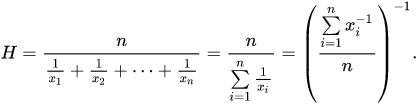

In [11]:
params = {"activation": ['identity', 'logistic', 'tanh', 'relu'], "solver" : ['lbfgs', 'sgd', 'adam'], 
          "alpha" : np.arange(0.,2.,0.1)}
n_jobs = -1
model = MLPClassifier()

In [12]:
# tune the hyperparameters via a cross-validated grid search
print("[INFO] tuning hyperparameters via grid search")
grid = GridSearchCV(model, params)
start = time.time()
grid.fit(X_train_transformed, y_train)
 
# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(
	time.time() - start))
acc = grid.score(X_test_transformed, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(
	grid.best_params_))

[INFO] tuning hyperparameters via grid search


/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

[INFO] grid search took 604.30 seconds
[INFO] grid search accuracy: 69.57%
[INFO] grid search best parameters: {'activation': 'identity', 'alpha': 0.80000000000000004, 'solver': 'adam'}


In [14]:
# tune the hyperparameters via a randomized search
print("[INFO] tuning hyperparameters via randomized search")
grid = RandomizedSearchCV(model, params)
start = time.time()
grid.fit(X_train_transformed, y_train)
 
# evaluate the best randomized searched model on the testing
# data
print("[INFO] randomized search took {:.2f} seconds".format(
	time.time() - start))
acc = grid.score(X_test_transformed, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] randomized search best parameters: {}".format(
	grid.best_params_))

[INFO] tuning hyperparameters via randomized search


/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jorgher/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

[INFO] randomized search took 21.54 seconds
[INFO] grid search accuracy: 67.08%
[INFO] randomized search best parameters: {'activation': 'identity', 'alpha': 1.8, 'solver': 'adam'}


[INFO] tuning hyperparameters via grid search

[INFO] grid search took 551.35 seconds

[INFO] grid search accuracy: 69.36%

[INFO] grid search best parameters: {'activation': 'identity', 'solver': 'adam', 'alpha': 0.80000000000000004}



[INFO] tuning hyperparameters via randomized search

[INFO] randomized search took 23.60 seconds

[INFO] grid search accuracy: 68.53%

[INFO] randomized search best parameters: {'activation': 'identity', 'alpha': 1.8, 'solver': 'lbfgs'}

In [15]:
import pickle
clf_ = MLPClassifier(activation= 'identity', solver= 'adam', alpha= 0.80000000000000004).fit(X_train_transformed, y_train)
scores = scores = cross_val_score(clf, X_test_transformed, y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
clf = MLPClassifier(activation= 'identity', solver= 'lbfgs', alpha=1.8).fit(X_train_transformed, y_train)
scores = cross_val_score(clf, X_test_transformed, y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.19607843  0.32        0.26        0.36        0.32653061  0.34693878
  0.36956522  0.39130435  0.32608696  0.32608696]
Accuracy: 0.32 (+/- 0.11)
[ 0.62745098  0.7         0.66        0.72        0.6122449   0.79591837
  0.63043478  0.63043478  0.7173913   0.56521739]
Accuracy: 0.67 (+/- 0.13)


In [33]:
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
p = clf2.predict([[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792],[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792],[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792],[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792],[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792],[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792],[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792],[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792],[ 0.39466814,  0.36386604,  0.37833949,  0.08193851,  0.08193851,  0.23204663,
   0.70771351,  0.01217944,  0.00351996,  0.0120441,   0.00504033,  0.00701828,
   0.01361792]
 ])
p = list(np.array(p))

p_ = max(p,key=p.count)

print(p)
print(p_)
print(Etype_[p_])
print("la emocion es: {}".format(Etype_[p_]))

[3, 3, 3, 3, 3, 3, 3, 3, 3]
3
fearful
la emocion es: fearful
